In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
from xgboost import XGBClassifier 
from sklearn.metrics import confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <BBC4A126-D15A-3802-AD26-108872BA781A> /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [ ]:
df = pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [ ]:
df.shape

(10409, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000,1.040900e+04
mean,13.959910,14.111936,13.809163,13.966757,13.350337,3.321778e+08
std,30.169244,30.514878,29.835055,30.191696,29.911132,3.393344e+08
min,0.049665,0.049665,0.049107,0.049107,0.038384,0.000000e+00
25%,0.281964,0.287946,0.274554,0.281250,0.234799,1.247604e+08
50%,0.468750,0.477679,0.459821,0.468750,0.386853,2.199680e+08
75%,14.217857,14.364286,14.043571,14.206071,12.188149,4.126108e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,7.421641e+09


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


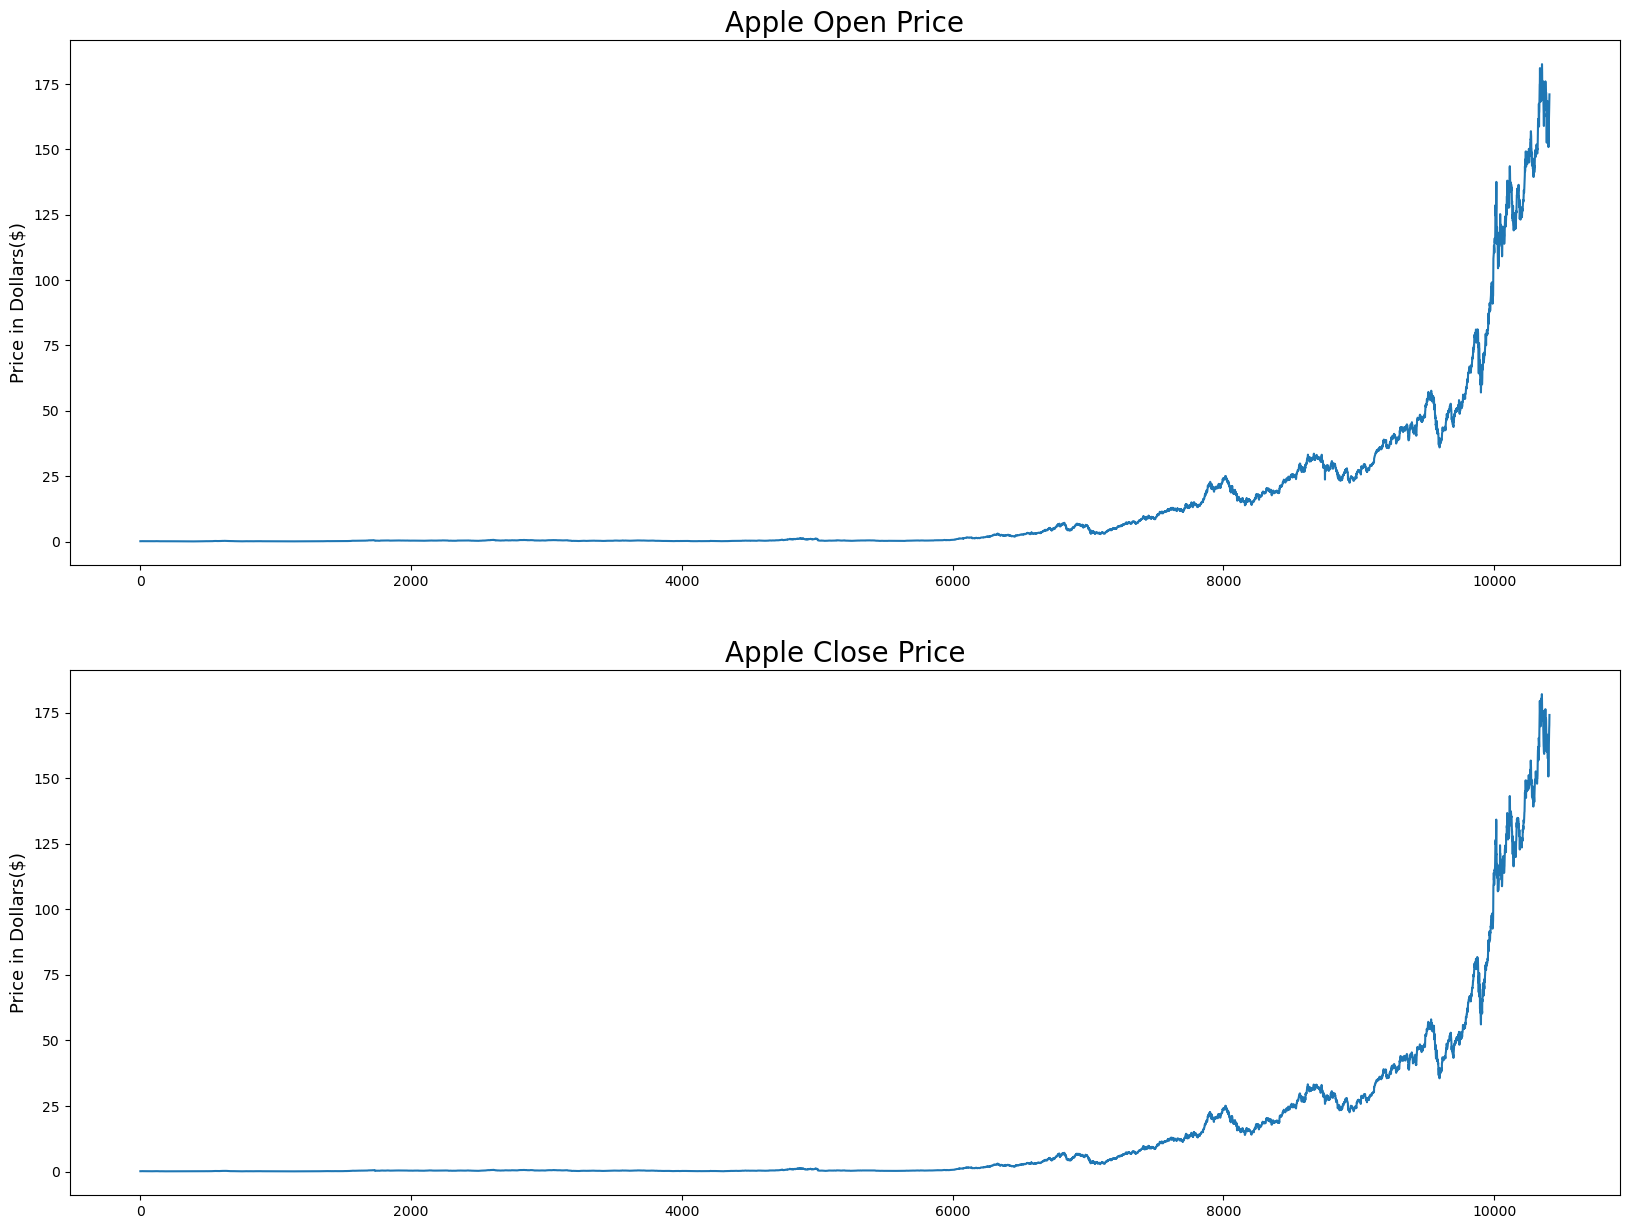

In [ ]:
plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
plt.plot(df["Open"])
plt.title("Apple Open Price", fontsize = 20)
plt.ylabel("Price in Dollars($)", fontsize = 13)

plt.subplot(2,1,2)
plt.plot(df["Close"])
plt.title("Apple Close Price",fontsize = 20)
plt.ylabel("Price in Dollars($)", fontsize = 13)

plt.show()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [ ]:
df[df["Close"] == df["Adj Close"]].shape

(34, 7)

In [ ]:
df = df.drop(["Adj Close"] , axis = 1)

In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

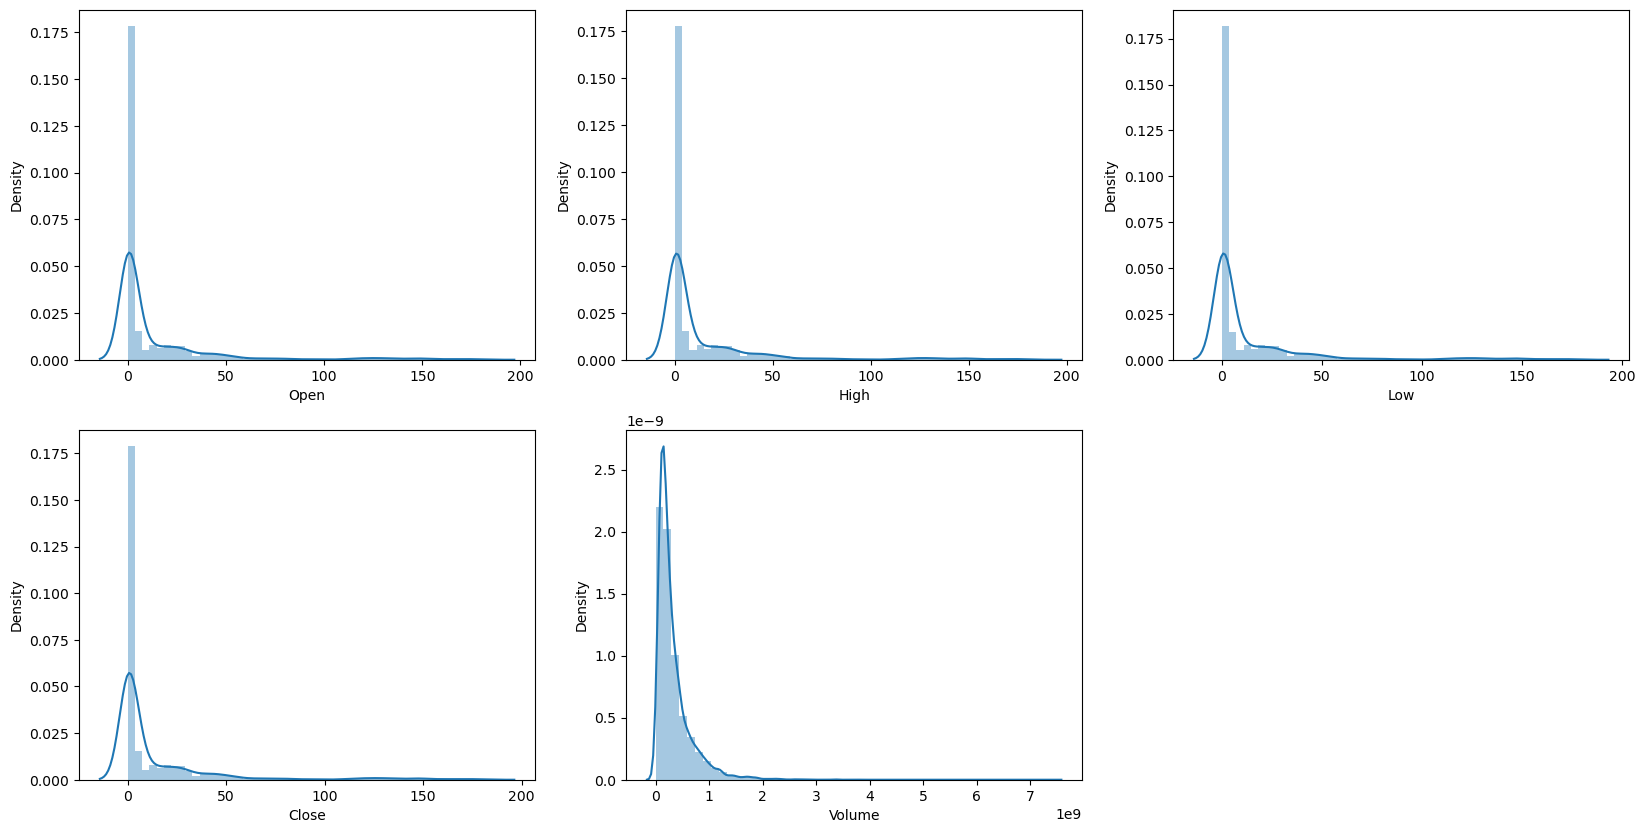

In [ ]:
columns = ["Open","High","Low","Close","Volume"]

plt.subplots(figsize = (20,10))

for i,col in enumerate(columns):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
plt.show()

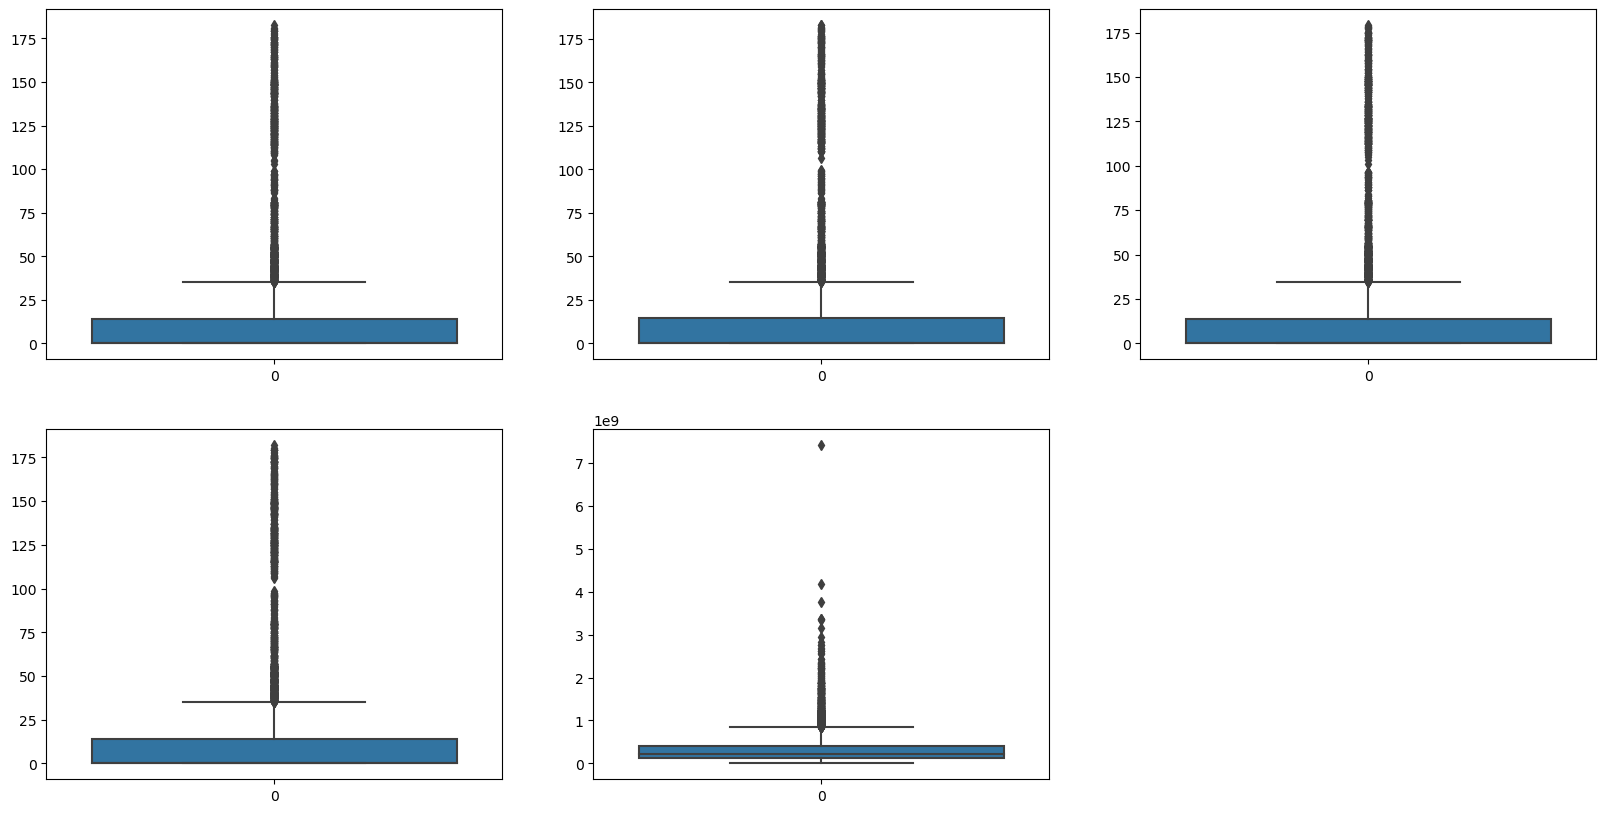

In [ ]:
plt.subplots(figsize = (20,10))

for j,col in enumerate(columns):
    plt.subplot(2,3,j+1)
    sns.boxplot(df[col])
plt.show()

In [ ]:
splitted = df["Date"].str.split("-",expand = True)

df["day"] = splitted[2].astype('int')
df["month"] = splitted[1].astype('int')
df["year"] = splitted[0].astype('int')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,12,12,1980
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,15,12,1980
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,16,12,1980
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,17,12,1980
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,18,12,1980


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3 == 0,1,0)
df.head(100)

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,12,12,1980,1
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,15,12,1980,1
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,16,12,1980,1
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,17,12,1980,1
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,18,12,1980,1
...,...,...,...,...,...,...,...,...,...,...
95,1981-04-30,0.126674,0.127790,0.126674,0.126674,12611200,30,4,1981,0
96,1981-05-01,0.126674,0.127790,0.126674,0.126674,16553600,1,5,1981,0
97,1981-05-04,0.126674,0.126674,0.126116,0.126116,14448000,4,5,1981,0
98,1981-05-05,0.126116,0.126116,0.125558,0.125558,17539200,5,5,1981,0


In [ ]:
df = df.drop(['Date'],axis = 1)

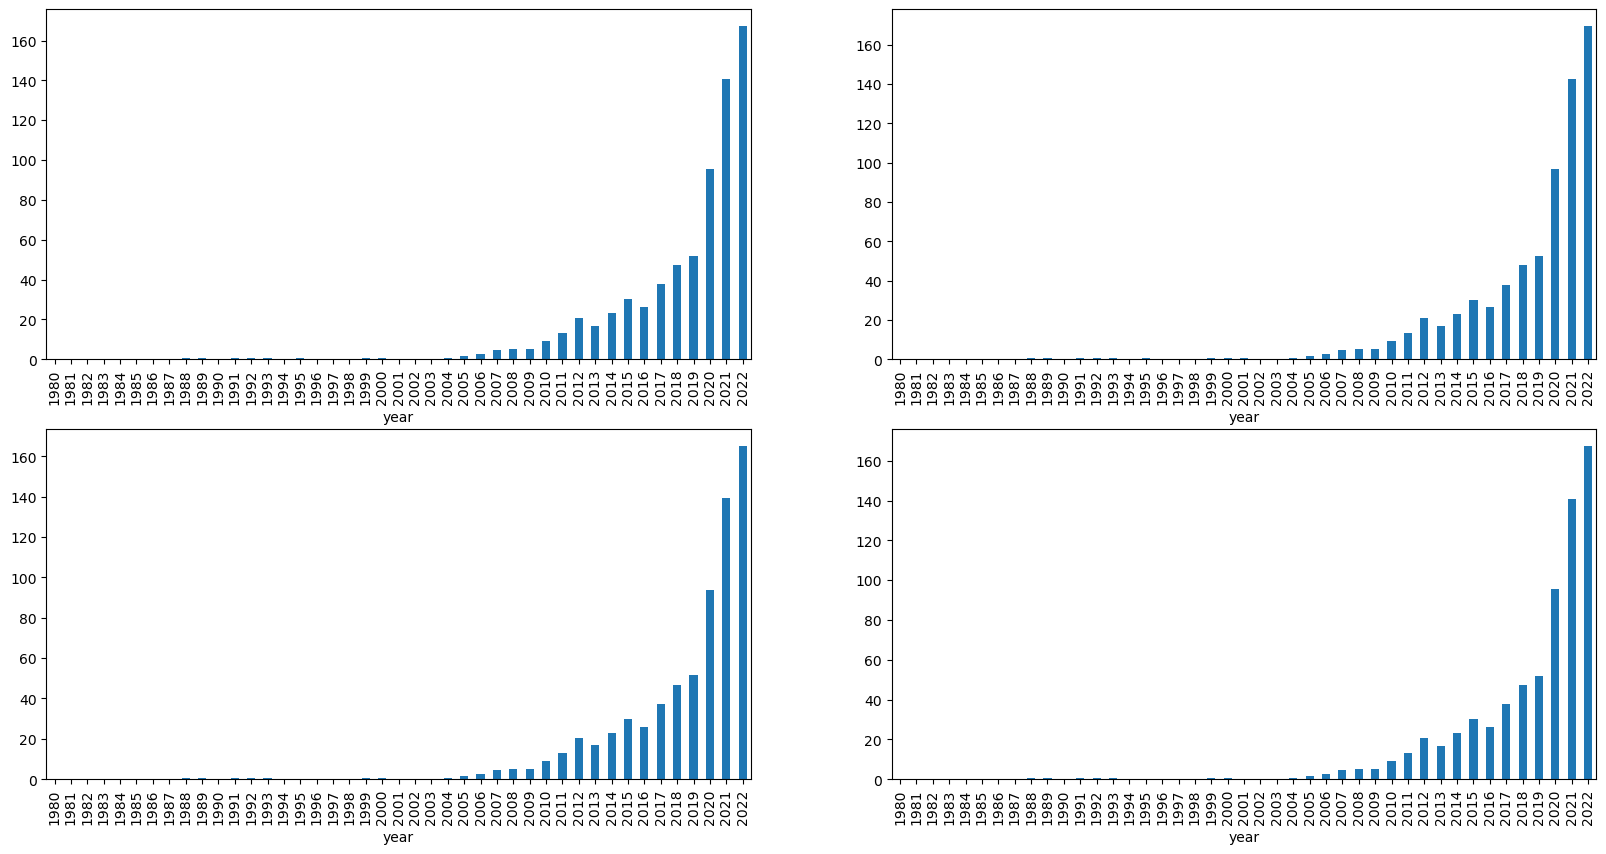

In [ ]:
data_grouped = df.groupby('year').mean() 
plt.subplots(figsize=(20,10)) 

for i, col in enumerate(['Open', 'High', 'Low', 'Close']): 
    plt.subplot(2,2,i+1) 
    data_grouped[col].plot.bar() 
plt.show()

In [ ]:
df.groupby(['is_quarter_end']).mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,13.823884,13.971968,13.681730,13.835594,3.412706e+08,15.727036,6.055201,2001.095335
1,14.227618,14.387401,14.059961,14.224895,3.142828e+08,15.755632,7.434559,2001.013972


In [ ]:
df['Open-Close'] = df['Open'] - df['Close']
df['Low-High'] = df['Low'] - df['High']

df['Target'] = np.where(df['Close'].shift(-1) > df['Close'],1,0)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,Open-Close,Low-High,Target
0,0.128348,0.128906,0.128348,0.128348,469033600,12,12,1980,1,0.000000,-0.000558,0
1,0.122210,0.122210,0.121652,0.121652,175884800,15,12,1980,1,0.000558,-0.000558,0
2,0.113281,0.113281,0.112723,0.112723,105728000,16,12,1980,1,0.000558,-0.000558,1
3,0.115513,0.116071,0.115513,0.115513,86441600,17,12,1980,1,0.000000,-0.000558,1
4,0.118862,0.119420,0.118862,0.118862,73449600,18,12,1980,1,0.000000,-0.000558,1


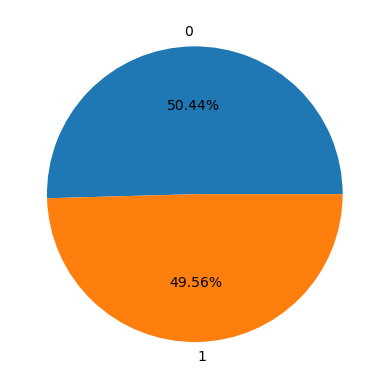

In [ ]:
plt.pie(df['Target'].value_counts().values,labels=[0, 1], autopct='%1.2f%%') 
plt.show()

In [ ]:
features = df[['Open-Close','Low-High','is_quarter_end']] 
target = df['Target'] 

scaler = StandardScaler() 
features = scaler.fit_transform(features) 

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022) 
print(X_train.shape, X_valid.shape) 

(9368, 3) (1041, 3)


In [ ]:
models = [LogisticRegression(), SVC(probability = True), XGBClassifier()] 
  
for i in range(3): 
  models[i].fit(X_train, Y_train) 
  
  print(f'{models[i]} : ') 
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1])) 
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1])) 
  print()

LogisticRegression() : 
Training Accuracy :  0.5289966748732771
Validation Accuracy :  0.5110848986945478

SVC(probability=True) : 
Training Accuracy :  0.5436496041737205
Validation Accuracy :  0.530670373323882

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.78